# Jupyter notebook to reproduce results of Chapter 5 of the Thesis

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import os
import itertools
from tqdm import tqdm

def makehampbc(t,F,m):
    H=np.diag(t[0:F-1],1)+np.diag(t[0:F-1],-1)+m*np.eye(F)
    H[0,F-1]=t[F-1]
    H[F-1,0]=t[F-1]
    return H

def makehamobc(t,F,m):
    #note that this Hamiltonian has F+1 sites
    H=np.diag(t[0:F],1)+np.diag(t[0:F].conj(),-1)+m*np.eye(F+1)
    return H

def getspect(H): 
    eigval, eigvect=np.linalg.eig(H)
    idx = eigval.argsort()
    eigval = eigval[idx]
    eigvect= eigvect[:,idx]
    return (eigval,eigvect)

def FiboWord(n): #consists of N=Fibonumb((n)) letters
    if n<1:
        print("Incorrect input")
    elif n==1:
        return "0" #first Fibonacci word
    elif n==2:
        return "01" #second Fibonacci word
    else:
        Sn_1 = "0"
        Sn = "01"
        tmp = "" 
        for i in range(2, n ): 
            tmp = Sn 
            Sn += Sn_1 
            Sn_1 = tmp 
        return Sn 

def Fibonr(n): 
    if n<0: 
        print("Incorrect input") 
    # first Fibonacci number is 1 
    elif n==0: 
        return 1
    # second Fibonacci number is 1 
    elif n==1: 
        return 1
    else: 
        return Fibonr(n-1)+Fibonr(n-2)
    
def PellWord(n): #consists of N=Pellnr((n+2)) letters
    if n<1:
        print("Incorrect input")
    elif n==1:
        return "0" # First Pell word
    elif n==2:
        return "001" #Second Pell word
    else:
        Sn_1= "0"
        Sn= "001"
        tmp=""
        for i in range(2,n+1):
            tmp=Sn
            Sn=Sn+Sn+Sn_1
            Sn_1=tmp
        return Sn

def Pellnr(n):
    if n<0:
        print("Incorrect input")
    elif n==0:
        return 0 #first Pell nr is 0
    elif n==1:
        return 1 #second Pell nr is 1
    else: 
        return 2*Pellnr(n-1)+Pellnr(n-2)
    
def TriboWord(n):
    if n<1:
        print("Incorrect input.")
    elif n==1:
        return "0" #first Tribo word
    elif n==2:
        return "01" #second Tribo word
    elif n==3:
        return "0102" #third Tribo word
    else:
        Sn_2="0"
        Sn_1="01"
        Sn="0102"
        tmp1=""
        tmp2=""
        for i in range(2,n+1):
            tmp1=Sn
            tmp2=Sn_1
            Sn=Sn+Sn_1+Sn_2
            Sn_1=tmp1
            Sn_2=tmp2
        return Sn

def Tribonr(n):
    if n<0:
        print("Incorrect input")
    elif n==0:
        return 1 #first trib nr
    elif n==1: 
        return 1 #second trib nr
    elif n==2:
        return 2 #third trib nr
    else:
        return Tribonr(n-1)+Tribonr(n-2)+Tribonr(n-3)
    
def TMWord(n): #n generation Thue-Morse word. 
    if n<1:
        print("Incorrect input")
    elif n==1:
        return "01" # First TM word
    elif n==2:
        return "0110" #Second TM word
    else:
        def bitnegation(word):
            negword=""
            for n in range(len(word)):
                if word[n]=="0":
                    negword+="1"
                elif word[n]=="1":
                    negword+="0"
            return negword
        Sn_1= "01"
        Sn= ""
        for i in range(2,n+1):
            Sn=Sn_1+bitnegation(Sn_1)
            Sn_1=Sn
        return Sn
    
def RSWord(n): #n generation Rudin-Shapiro word.
    def count_substring(string, sub_string):
        count = 0
        for pos in range(len(string)):
            if string[pos:].startswith(sub_string):
                count += 1
        return count
    Sn=""
    for i in range(0,2**n):
        if count_substring(bin(i)[2:],"11")%2==0:
            Sn+="0"
        else:
            Sn+="1"
    return Sn

def bihopping(word, N, ts, tw):
    #generate the hopping sequence of tw and ts from a binary word of length N
    T=np.zeros([N])
    for i in range(N):
        if word[i]=='0':
            T[i]=tw
        elif word[i]=='1':
            T[i]=ts
    return T

def trihopping(word, N, ts, tw, tww):
    #generate the hopping sequence of ts, tw and tww  from a ternary word of length N
    T=np.zeros([N])
    for i in range(N):
        if word[i]=='0':
            T[i]=tww
        elif word[i]=='1':
            T[i]=tw
        elif word[i]=="2":
            T[i]=ts
    return T

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [2]:
N = 16
F = Fibonr(N)
T = bihopping(FiboWord(N), F, 1, 0.2)
H = makehampbc(T,F,0)

E = getspect(H)[0]

F

1597

In [3]:
N, r = 13, 0.5
F = Tribonr(N)
T = trihopping(TriboWord(N), F, 1, r, r**2)
H = makehampbc(T,F,0)

E = getspect(H)[0]

F

1705

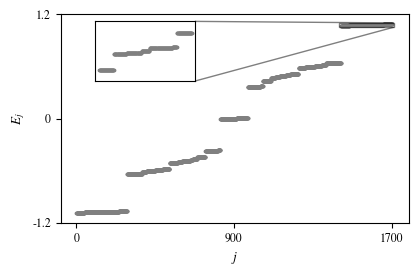

In [13]:
#plot Tribo spectrum

fig, ax = plt.subplots(figsize = (4.5,2.7108))

ax.scatter(np.arange(1,F+1),E, s=3, c="gray");

fz = 9.5
ft = 8.5

ax.set_xlabel("$j$", fontsize = fz),
ax.set_ylabel("$E_j$", fontsize = fz);

axins = ax.inset_axes([0.1, 0.68, 1/3.5, 1/3.5])
axins.scatter(np.arange(1,F+1),E, s=3, c="gray")

# subregion of the original image
nn = Tribonr(N-2) + Tribonr(N-1)
x1, x2, y1, y2 = nn-10, nn + Tribonr(N-3)+10, 1.05, 1.1
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks([])
axins.set_yticks([])

# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
ax.indicate_inset_zoom(axins, edgecolor="black")

ax.set_yticks([-1.2,0,1.2], ["-1.2", "0", "1.2"], fontsize = ft);
ax.set_xticks([0, F//2, F], ["0", f"{np.round(F/2 / 100) * 100:.0f}", f"{np.round(F / 100) * 100:.0f}"], fontsize = ft);

ax.set_ylim(-1.2,1.2)

# plt.savefig("TriboHopModelGood.pdf", dpi=300, bbox_inches="tight")

In [257]:
#Computing multifractal dimensions of energy spectrum 

N = 12
F = Fibonr(N)
T = bihopping(FiboWord(N), F, 1, 0.2)
H = makehampbc(T,F,0)

E = getspect(H)[0]

#LArgest scale of energy
mxscl = np.abs(np.max(E)-np.min(E))

#Rescale the energy spectrum to max unity: 
E1 = E/mxscl

#Smallest scale of energy spectrum

sscl = []
for i in tqdm(range(len(E))):
    for j in range(len(E)):
        if i != j: 
            sscl = np.append(np.abs(E1[i]-E1[j]),sscl)

mnscl = np.min(sscl)

#Decompose the unit box into smaller ones of side lengths 1/k
M = 100 
k = np.zeros(M)
for m in range(M):
    k[m] = np.floor(mnscl**(-m/M))
    

# Compute the parition function for each m as a function of q
nq = 50
q = np.linspace(0,20,nq)
Zm = np.zeros([M,nq])

for m in tqdm(range(M)):
    #Compute fraction of points inside unit box
    for j in range(nq):
        frac = np.zeros(int(k[m]))
        for i in range(int(k[m])):
            nb = np.sum((E1>np.min(E1) + i/k[m]) & (E1<np.min(E1) + (i+1)/k[m]))/len(E1)
            frac[i] = nb**q[j]
        
        Zm[m,j] = np.sum(frac)


xq = np.zeros([M,nq])
yq = np.zeros([M,nq])

for j in range(nq):
    xq[:,j] = np.log(1/k)
    yq[:,j] = np.log(Zm[:,j])/(q[j]-1)
    
#Multifractal dimension
Dq = np.zeros(nq)

for j in range(nq):
    Dq[j] = sp.stats.linregress(xq[:,j],yq[:,j])[0]

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [39:06<00:00, 23.47s/it]


In [261]:
# Construction of f(alpha)

alf =np.zeros(nq)
fa = np.zeros(nq)

tau = (q-1)*Dq
ddq = np.abs(q[1]-q[2])

#Compute alpha from derivative
for i in range(nq-1):
    alf[i] = (tau[i+1]-tau[i])/ddq
    
f = q*alf-tau

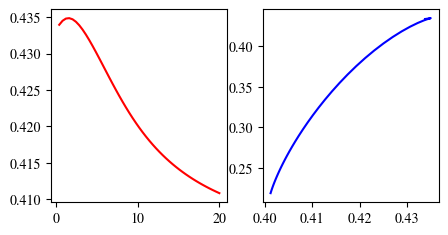

In [280]:
fig, ax = plt.subplots(1,2, figsize = (5,2.5))

ax[0].plot(q[1:], Dq[1:], c="r")
ax[1].plot(alf[1:nq-1],f[1:nq-1],c="b")

# plt.ylim(0,0.7)

# Plotting the Spectrum for the Fibonacci chain

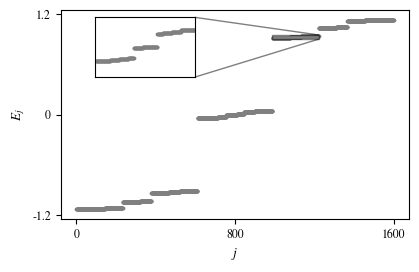

In [10]:
fig, ax = plt.subplots(figsize = (4.5,2.7108))

ax.scatter(np.arange(1,F+1),E, s=3, c="gray");

fz = 9.5
ft = 8.5

ax.set_xlabel("$j$", fontsize = fz),
ax.set_ylabel("$E_j$", fontsize = fz);

axins = ax.inset_axes([0.1, 0.68, 1/3.5, 1/3.5])
axins.scatter(np.arange(1,F+1),E, s=3, c="gray")

# subregion of the original image
nn = Fibonr(N-2)+Fibonr(N-3)
x1, x2, y1, y2 = nn, nn + Fibonr(N-4), 0.9, 0.95
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks([])
axins.set_yticks([])

# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
ax.indicate_inset_zoom(axins, edgecolor="black")

ax.set_yticks([-1.2,0,1.2], ["-1.2", "0", "1.2"], fontsize = ft);
ax.set_xticks([0, F//2, F], ["0", f"{np.round(F/2 / 100) * 100:.0f}", f"{np.round(F / 100) * 100:.0f}"], fontsize = ft);

# plt.savefig("FiboHopModelGood.pdf", dpi=300, bbox_inches="tight")

# Constructing the Hamiltonian with impurities for the Fibonacci chain

In [140]:
N = 9
ts, tw, F = 5, 1, Fibonr(N)
T = bihopping(FiboWord(N), F, ts, tw)



H0 = makehampbc(T,F,0)

Vimp = 0.1*tw

# n=[16, 45, 37, 29, 21]                # Place impurities here (atomic)
# n=[43, 7, 14, 47, 10, 1]                # Place impurities here (molecular)
n = [[ 16, 45], [14, 16, 45]]     # Place multiple impurities here (atomic)
# n = [[9, 24]]          # Place multiple impurities here (molecular)

# Nimp=  len(n)       #number of impurities

# # uncomment for single impurity
# H = np.zeros([len(n)+1,F,F]) 
# psi = np.zeros([len(n)+1,F,F])

# #Single impurity cases
# for j in range(len(n)):
#     # atomic
#         v = np.zeros(F)
#         v[n[j]] = Vimp
#         H[j+1,:,:] = H0 + np.diag(v)
#         psi[j+1,:,:] = getspect(H[j+1,:,:])[1]
# #     # molecular
# #         v = np.zeros(F)
# #         v[n[j]] = Vimp
# #         H[j,:,:] = H0 + np.diag(v)
# #         psi[j,:,:] = getspect(H[j,:,:])[1]

# # uncomment for multiple impurities case
# H = np.zeros([2,F,F]) 
# psi = np.zeros([2,F,F])

#Multiple impurity case
for i in range(2):
        v = np.zeros(F)
        for j in range(len(n[i])):
            v[n[i][j]] = Vimp
        H[i,:,:] = H0 + np.diag(v)
        psi[i,:,:] = getspect(H[i,:,:])[1]


# # uncomment for atomic impurities
# H[0,:,:] = H0          
# psi[0,:,:] = getspect(H0)[1]      




## Setting up the conumbering scheme

In [144]:
#conumbering
Cn=np.array([int((i+1)*(Fibonr(N+1))%(F)) for i in range(F)])

#denoting atomic and molecular sites by -1 and 1 resp

tt=np.zeros([F])
SITES=np.zeros([1,F]) #initializing site representation

k=1

for i in range(F):
    if H[k,i,i] == Vimp:
        tt[i]=0
    else:
        if i<F-1 and i>0:

            if H[k,i,i-1] == tw and H[k,i,i+1] == tw:
                tt[i]=-1
            else:
                tt[i]=1

#applying boundary condition:
if H[k,0,0] == Vimp:
    tt[F-1]=0
elif H[k,0,0] != Vimp:
    if T[F-1]==tw:
        tt[F-1]=tt[0]=-1
    elif T[F-1]==ts:
        tt[F-1]=tt[0]=1


SITES[0,:]=tt

#aranging energy spectrum with conumber

MM=np.absolute(psi[k,Cn-1,:])
MM=list(reversed(np.transpose(MM)))

#arranging the sites according to whether they are atomic or molecular in conumber order 
TT = np.zeros([1,F])
TT[0,:] = tt[Cn-1]
TT[0,F-1] = tt[0]

# TT=np.zeros([1,F])
# TT[0,:]=tconum
# TT[0,F-1]=TT[0,0]


## Plotting the eigenstate maps

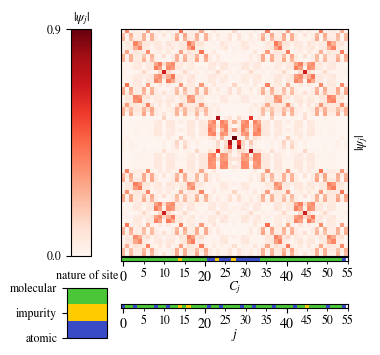

In [145]:
#plotting the fractal together with arrangement of atomic/molecular sites

fig, axs = plt.subplots(3,1, figsize=(10,10))

axM = axs[0].imshow(MM, cmap=plt.cm.Reds)
pos = axs[0].get_position()

axs[1].set_position([pos.x0, pos.y0-0.053, pos.width, 0.1])  # (left, bottom, width, height)
axs[2].set_position([pos.x0, pos.y0-0.1, pos.width, 0.1])  # (left, bottom, width, height)

fz = 9.5
ft = 8.5

axs[0].axes.set_yticklabels([]);
axs[0].axes.set_xticklabels([]);
axs[0].set_yticks([]);
axs[1].set_yticks([]);
axs[2].set_yticks([]);
axs[1].axes.set_yticklabels([]);
axs[2].axes.set_yticklabels([]);

axs[1].axes.set_xlabel("$C_j$", fontsize=fz, labelpad = -3);
axs[0].axes.yaxis.set_label_position("right");
axs[0].axes.set_ylabel("$|\\psi_j|$", fontsize=fz);
axs[2].axes.set_xlabel("$j$", fontsize=fz, labelpad = -3);

# # Adding lattice sites and their conumber mapping.
colorsList = ["#394bc6ff","#ffcc00ff","#4bc639ff"]
CustomCmap = clrs.ListedColormap(colorsList)
axC = axs[1].imshow(TT[:], cmap=CustomCmap)
axS = axs[2].imshow(SITES[:], cmap=CustomCmap)

# # Minor ticks

xticks = np.linspace(0,F,12)
tiklabel = [f"{xticks[i]:.0f}" for i in range(len(xticks))]
axs[1].set_xticks(xticks, tiklabel, fontsize=ft, minor=True);
axs[2].set_xticks(xticks, tiklabel, fontsize=ft, minor=True);

# axs[1].grid(which='minor', color='w', linestyle='-', linewidth=1)
# axs[2].grid(which='minor', color='w', linestyle='-', linewidth=1)



# Adding the colorbar

poss = axs[0].get_position()
cbaxes = fig.add_axes([poss.x0-.05, poss.y0, 0.02, poss.height]) # This is the position for the colorbar
cb = plt.colorbar(axM, cax = cbaxes)
cb.ax.set_yticks([0,np.max(MM)], ["0.0", f"{np.max(MM):.1f}"], fontsize = ft)
cb.ax.yaxis.tick_left()
cb.ax.tick_params(axis='y', labelleft=True, labelright=False)
cb.ax.set_title("$|\\psi_j|$", fontsize=fz)

# This is the position for the at/mol cbar

pos = axs[2].get_position()
cbaxes2 = fig.add_axes([pos.x0-0.24*pos.width, pos.y0-0.03, 0.04, 0.05])  
cb = plt.colorbar(axC, cax = cbaxes2, ticks=[1, 0, -1])
cb.ax.set_title("nature of site", fontsize=ft)
cb.ax.set_yticklabels(['molecular', 'impurity', 'atomic'], fontsize = ft)  # vertically oriented colorbar
cb.ax.yaxis.set_ticks_position('left')

# axs[0].set_title("(b) ", loc= "left", fontsize = fs);

#save

# Define the path
directory = 'C:\\Users\\tripl\\OneDrive\\Bureau\\PHD Thesis\\ImpurityFibonacci\\Newreplace'
filename = 'multiweakB.pdf'
full_path = os.path.join(directory, filename)

plt.savefig(full_path , dpi=600, bbox_inches='tight')

# plt.tight_layout(h_pad=-5, w_pad = -10)

## Calculating Inverse Participation Ratio (IPR) as a function of impurity strength

In [22]:
# IPR CALCULATION

N = 9 #(N)^th generation word
F = Fibonr(N) #amount of links in chain
ch = FiboWord(N)

ts,tw = 5, 1

T = bihopping(FiboWord(N), F, ts, tw)
H = makehampbc(T,F,0)

#distributing the hoppings in a Fibonacci sequence
ts=5     #hopping strong
tw=1     #hopping weak


#Adding Impurities

Vimp1=tw       #weak impurity pot

VIMP=Vimp1*np.linspace(0,0.2,200)
# 

ma=[0,3,8,11,16,37,45] #all representatives of ARPs
mm = [33,34,35,36,38,39,40,41,12,13,14,15,4,5,6,7,43,1,2,9,10] #all representatives of MRPs
aIPR = np.zeros([len(VIMP),len(ma)]) #initializing average IPR at
mIPR = np.zeros([len(VIMP),len(mm)]) #initializing average IPR mol

m = [ma, mm]
IPR = [aIPR, mIPR]

for aa in range(2):

    for u in tqdm(range(len(m[aa]))):

        H = np.zeros([len(VIMP),F,F], dtype=np.complex128)
        v=np.zeros([F, len(VIMP)], dtype=np.complex128)

        n = [m[aa][u]]      # Place impurities here (multiple case)
        Nimp=  len(n)       #number of impurities

        for i in range(len(VIMP)):
            for j in range(Nimp):
                v[n[j],i]=VIMP[i]

        for i in range(len(VIMP)):

            #constructing Hamiltonians
            H[i,:,:] = makehampbc(T,F,0) + np.diag(v[:,i])

        #computing the spectrum of the Hamiltonians
        eigval = np.zeros([len(VIMP),F], dtype=np.complex128)
        eigvect = np.zeros([len(VIMP),F,F], dtype=np.complex128)

        for i in range(len(VIMP)):
            eigval[i,:], eigvect[i,:,:] = getspect(H[i,:,:])

            IPR[aa][i,u]=1/F*np.sum(1/np.sum(np.absolute(eigvect[i,:,:])**4, axis = 1))    #Inverse participation ratio


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:09<00:00,  2.23it/s]


In [25]:
Ip = [np.zeros([len(VIMP),len(m[0])]), np.zeros([len(VIMP),len(m[1])])]

for ww in tqdm(range(2)):

    psi=np.zeros([len(VIMP),len(m[ww]),F,F], dtype=np.complex128)
    psq=np.zeros([len(VIMP),len(m[ww]),F], dtype=np.complex128)
    psqr=np.zeros([len(VIMP),len(m[ww]),F], dtype=np.complex128)
    S=np.zeros([len(m[ww]),F,F], dtype=np.complex128)

    for q in range(len(m[ww])):
        for a in range(F):
            for i in range(F):
                for b in range(F):
                    if b!=a:
                        S[q,a,i]+=eigvect[0,int(m[ww][q]),a]*eigvect[0,int(m[ww][q]),b].conj()*eigvect[0,i,b]/(eigval[0,a]-eigval[0,b])
    for q in range(len(m[ww])):
        for a in range(F):
            for v in range(len(VIMP)):
                psi[v,q,a,:]=eigvect[0,:,a]+VIMP[v]*S[q,a,:]
                psq[v,q,a]=np.sum(np.abs(psi[v,q,a,:])**2)
                psqr[v,q,a]=np.sum(np.abs(psi[v,q,a,:])**4)
        

    ip = np.zeros([len(VIMP),len(m[ww]),F], dtype=np.complex128)
    for a in range(F):
        for q in range(len(m[ww])):
            for v in range(len(VIMP)):
    #         ip[:,q,a]=1/A[a]-B[a,q]/(A[a])**2*VIMP+(B[a,q]**2-A[a]*c[a,q])/(A[a])**3*VIMP**2
                ip[v,q,a]=psq[v,q,a]/(psqr[v,q,a])
    Ip[ww]=1/F*np.sum(ip.real,axis=2)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:19<00:00,  9.80s/it]


## Plotting the IPR for all cases at once

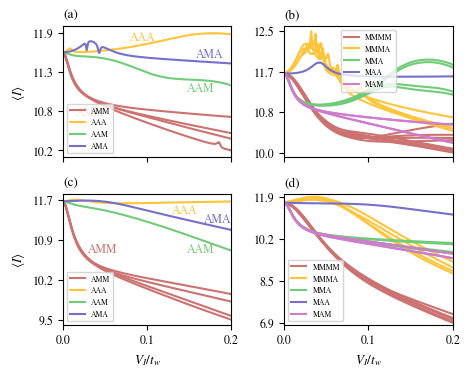

In [63]:
cM = ["#cc7270", "#ffc438ff", "#70cc78", "#7570cc", "#cf7bce"] 

RPMlab=["MMMM","MMMM","MMMM","MMMM","MMMM","MMMM","$MMMM$","MMMM","MMMA","MMMA","MMMA","MMMA","MMA","MMA","$MMA$","MMA","MAA","MAM","MAM","MAM","MAM"]
RPMc=[cM[0],cM[0],cM[0],cM[0],cM[0],cM[0],cM[0],cM[0],cM[1],cM[1],cM[1],cM[1],cM[2],cM[2],cM[2],cM[2],cM[3],cM[4],cM[4],cM[4],cM[4]]

RPAlab=["AMM","AMM","AMM","AMM","AAA","AAM","AMA"]
RPAc=[cM[0],cM[0],cM[0],cM[0],cM[1],cM[2],cM[3]]

RPlab = [RPAlab, RPMlab]
RPc = [RPAc, RPMc]

some_list=[[], []]

fig, ax = plt.subplots(2,2, figsize = (4.8,3.877))

fz = 9.5
ft = 8.5

for u in range(2):
    for i in range(len(m[u])):
        ax[0,u].plot(VIMP,IPR[u][:,i], "-",c=RPc[u][i], label=RPlab[u][i] if RPc[u][i] not in some_list[u] else "")
        ax[1,u].plot(VIMP,Ip[u][:,i], "-",c=RPc[u][i], label=RPlab[u][i] if RPc[u][i] not in some_list[u] else "")
        
        if RPc[u].count(RPc[u][i])>1:
            some_list[u].append(RPc[u][i])
    ax[0,u].legend(fontsize = ft-3)
    ax[1,u].legend(fontsize = ft-3)
    
            
for i in range(2):
#     ax[i,1].tick_params(axis='y', labelleft=False)
    ax[0,i].tick_params(axis='x', labelbottom=False)
    ax[1,i].set_xlabel("$V_I/t_w$", fontsize=fz);
    ax[i,0].set_ylabel(r"$\langle I \rangle  $", fontsize=fz);
    
xti = np.linspace(0, np.max(VIMP) ,3)
xlabs = [f"{xti[i]:.1f}" for i in range(len(xti))]

for axs in ax.flatten():
    axs.set_xlim([0, np.max(VIMP)])
    axs.set_xticks(xti,xlabs, fontsize = ft)
#     axs.legend()
    
for u in range(2):
    yti1 = np.linspace(np.min(IPR[u]), np.max(IPR[u]), 4)
    ylab1 = [f"{yti1[i]:.1f}" for i in range(len(yti1))]
    ax[0,u].set_ylim([np.min(IPR[u])-.1, np.max(IPR[u])+.1])
    ax[0,u].set_yticks(yti1, ylab1, fontsize = ft)
    
    yti2 = np.linspace(np.min(Ip[u]), np.max(Ip[u]), 4)
    ylab2 = [f"{yti2[i]:.1f}" for i in range(len(yti2))]
    ax[1,u].set_ylim([np.min(Ip[u])-.1, np.max(Ip[u])+.1])
    ax[1,u].set_yticks(yti2, ylab2, fontsize = ft)
    
# Add text above line plots

ax[0,0].text(0.05 , 10.7, "AMM", color=cM[0], fontsize=ft, ha='right')
ax[1,0].text(0.065 , 10.7, "AMM", color=cM[0], fontsize=ft, ha='right')
ax[0,0].text(0.11 , 11.8, "AAA", color=cM[1], fontsize=ft, ha='right')
ax[1,0].text(0.16 , 11.43, "AAA", color=cM[1], fontsize=ft, ha='right')
ax[0,0].text(0.18 , 11.05, "AAM", color=cM[2], fontsize=ft, ha='right')
ax[1,0].text(0.18 , 10.7, "AAM", color=cM[2], fontsize=ft, ha='right')
ax[0,0].text(0.19 , 11.55, "AMA", color=cM[3], fontsize=ft, ha='right')
ax[1,0].text(0.2 , 11.25, "AMA", color=cM[3], fontsize=ft, ha='right')


# ax[0,0].text(PBCre - 0.55, PBCim - 0.25, "PBC", color='k', fontsize=ft, ha='right')
    
dicts={"(a)": ax[0,0], "(b)": ax[0,1], "(c)": ax[1,0], "(d)": ax[1,1]}

for key, axs in dicts.items():
    axs.set_title(key, loc='left', fontsize=fz)
    
plt.tight_layout()

# plt.savefig("AVGIPR.svg", dpi=300, bbox_inches="tight")


# Calculation of the overlap integrals

In [64]:
# OLP CALCULATION

N = 9 #(N)^th generation word
F = Fibonr(N) #amount of links in chain
ch = FiboWord(N)

ts,tw = 5, 1

T = bihopping(FiboWord(N), F, ts, tw)
H = makehampbc(T,F,0)

#distributing the hoppings in a Fibonacci sequence
ts=5     #hopping strong
tw=1     #hopping weak


#Adding Impurities

Vimp1=tw       #weak impurity pot

VIMP=Vimp1*np.linspace(0,0.1,200)
# 

ma=[0,3,8,11,16,37,45] #all representatives of ARPs
mm = [33,34,35,36,38,39,40,41,12,13,14,15,4,5,6,7,43,1,2,9,10] #all representatives of MRPs

aOLP = np.zeros([len(VIMP),len(ma),2]) #initializing average OLP at with [Vi, imp, cluster] indices
mOLP = np.zeros([len(VIMP),len(mm),2]) #initializing average OLP mol with [Vi, imp, cluster] indices

m = [ma, mm]
OLP = [aOLP, mOLP]

for aa in range(2):

    for u in tqdm(range(len(m[aa]))):

        eigvect = np.zeros([len(VIMP),F,F], dtype=np.complex128)

        v=np.zeros([F, len(VIMP)], dtype=np.complex128)

        n = [m[aa][u]]                # Place impurities here (multiple case)
        Nimp=  len(n)       #number of impurities

        for i in range(len(VIMP)):
            for j in range(Nimp):
                v[n[j],i]=VIMP[i]

#         for i in range(len(VIMP)):

#             #constructing Hamiltonians

#             H[i,:,:] = makehampbc(T,F,0) + np.diag(v[:,i])

        #computing the spectrum of the Hamiltonians

        for i in range(len(VIMP)):
            H = makehampbc(T,F,0) + np.diag(v[:,i])
            eigvect[i,:,:] = getspect(H)[1]
            
        IDm = np.append(np.arange(Fibonr(N-2)), np.arange(Fibonr(N-1),F)) #molecular state indices
        IDa = np.arange(Fibonr(N-2),Fibonr(N-1)) #atomic state indices
        
        psia = eigvect[:,:,IDa]
        psim = eigvect[:,:,IDm]
           
        for i in range(len(VIMP)):
            olpa = np.sum(np.abs(psia[0,:,:].conj()*psia[i,:,:]), axis = 1)

            olpm = np.sum(np.abs(psim[0,:,:].conj()*psim[i,:,:]), axis = 1)

            OLP[aa][i,u,0] = np.sum(olpa.real)/len(IDa)    #Avg OLP int for atomic cluster
            OLP[aa][i,u,1] = np.sum(olpm.real)/len(IDm)    #Avg OLP int for molecular cluster
        

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:08<00:00,  2.60it/s]


## Plotting all the overlap integrals at once

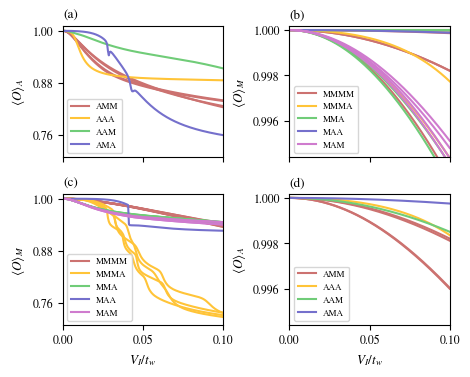

In [70]:
cM = ["#cc7270", "#ffc438ff", "#70cc78", "#7570cc", "#cf7bce"] 

RPMlab=["MMMM","MMMM","MMMM","MMMM","MMMM","MMMM","$MMMM$","MMMM","MMMA","MMMA","MMMA","MMMA","MMA","MMA","$MMA$","MMA","MAA","MAM","MAM","MAM","MAM"]
RPMc=[cM[0],cM[0],cM[0],cM[0],cM[0],cM[0],cM[0],cM[0],cM[1],cM[1],cM[1],cM[1],cM[2],cM[2],cM[2],cM[2],cM[3],cM[4],cM[4],cM[4],cM[4]]

RPAlab=["AMM","AMM","AMM","AMM","AAA","AAM","AMA"]
RPAc=[cM[0],cM[0],cM[0],cM[0],cM[1],cM[2],cM[3]]

RPlab = [RPAlab, RPMlab]
RPc = [RPAc, RPMc]

some_list=[[], []]

fig, ax = plt.subplots(2,2, figsize = (4.8,3.877))

fz = 9.5
ft = 8.5

for u in range(2):
    for i in range(len(m[u])):
        ax[0,u].plot(VIMP,OLP[u][:,i,0], "-",c=RPc[u][i], label=RPlab[u][i] if RPc[u][i] not in some_list[u] else "")
        ax[1,(u+1)%2].plot(VIMP,OLP[u][:,i,1], "-",c=RPc[u][i], label=RPlab[u][i] if RPc[u][i] not in some_list[u] else "")

        if RPc[u].count(RPc[u][i])>1:
            some_list[u].append(RPc[u][i])
    ax[0,u].legend(fontsize = fz-3)
    ax[1,(u+1)%2].legend(fontsize = fz-3)
    
    
for i in range(2):
#     ax[i,1].tick_params(axis='y', labelleft=False)
    ax[0,i].tick_params(axis='x', labelbottom=False)
    ax[1,i].set_xlabel("$V_I/t_w$", fontsize=fz);
    
    ax[(i-1)%2,(i+1)%2].set_ylabel(r"$\langle O \rangle_A  $", fontsize=fz);
    ax[(i+1)%2,i].set_ylabel(r"$\langle O \rangle_M  $", fontsize=fz);
    
xti = np.linspace(0, np.max(VIMP) ,3)
xlabs = [f"{xti[i]:.2f}" for i in range(len(xti))]

for axs in ax.flatten():
    axs.set_xlim([0, np.max(VIMP)])
    axs.set_xticks(xti,xlabs, fontsize = ft)
    

mx1, mx2 = np.max(OLP[0][:,:,0]), np.max(OLP[0][:,:,1])
mn1, mn2 = np.min(OLP[0][:,:,0]), np.min(OLP[0][:,:,1])
    
for u in range(2):    
    yti1 = np.linspace(mn1, mx1, 3)
    ylab1 = [f"{yti1[i]:.2f}" for i in range(len(yti1))]
    ax[u,0].set_ylim([mn1-.05, mx1+.01])
    ax[u,0].set_yticks(yti1, ylab1, fontsize = ft)
    
    yti2 = np.linspace(mn2, mx2, 3)
    ylab2 = [f"{yti2[i]:.3f}" for i in range(len(yti2))]
    ax[u,1].set_ylim([mn2-.0015, mx2+.00015])
    ax[u,1].set_yticks(yti2, ylab2, fontsize = ft)
    
dicts={"(a)": ax[0,0], "(b)": ax[0,1], "(c)": ax[1,0], "(d)": ax[1,1]}

for key, axs in dicts.items():
    axs.set_title(key, loc='left', fontsize=fz)
    
plt.tight_layout(w_pad=-0.2)

plt.savefig("AVGOLP.pdf", dpi=300, bbox_inches="tight")


# Cases for multiple impurities

In [74]:
# IPR CALCULATION multiimp comparisons

N=[9] #(N+1)^th generation word


ts=5     #hopping strong
tw=1     #hopping weak

#Adding Impurities

Vimp1=tw       #weak impurity pot

VIMP=Vimp1*np.linspace(0, 1,200)

F = np.zeros(len(N))

IPR = [np.zeros([len(VIMP)]), np.zeros([len(VIMP)]), np.zeros([len(VIMP)]), np.zeros([len(VIMP)])]
IPRavg = [np.zeros([len(VIMP)]), np.zeros([len(VIMP)]), np.zeros([len(VIMP)]), np.zeros([len(VIMP)])]

m = [[10,42], [10,16,50], [10,16,24,42,50]]

for u in tqdm(range(len(m))):    
    for r in range(len(N)):

        F[r] = Fibonr(N[r]) 
        
        T = bihopping(FiboWord(N[r]), int(F[r]), ts, tw)
        v=np.zeros([int(F[r]),len(VIMP)], dtype=np.complex128)
        
        n = m[u]           
        Nimp = len(n)       #number of impurities

        for i in range(len(VIMP)):
            for j in range(Nimp):
                v[n[j],i] = VIMP[i]

        for i in range(len(VIMP)):
            H = makehampbc(T,int(F[r]),0) + np.diag(v[:,i])
            
            eigvect = getspect(H)[1]
            
            IPR[u][i]=1/F[r]*np.sum(1/np.sum(np.absolute(eigvect)**4, axis = 1))   #Inverse participation ratio
            
        #Calculating the single impurity averages
        
        ipr = np.zeros([len(VIMP),len(m[u])])
        for aa in range(len(m[u])):
        
            vg = np.zeros([int(F[r]),len(VIMP)], dtype=np.complex128)
            for i in range(len(VIMP)):
                vg[m[u][aa],i] = VIMP[i]
                
            for i in range(len(VIMP)):
                
                H = makehampbc(T,int(F[r]),0) + np.diag(vg[:,i])
                eigvect = getspect(H)[1]

                ipr[i,aa]=1/F[r]*np.sum(1/np.sum(np.absolute(eigvect)**4, axis = 1))   #Inverse participation ratio for one impr
            
        IPRavg[u] = 1/len(m[u])*np.sum(ipr, axis = 1) #IPR average over single impurities

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:05<00:00,  1.71s/it]


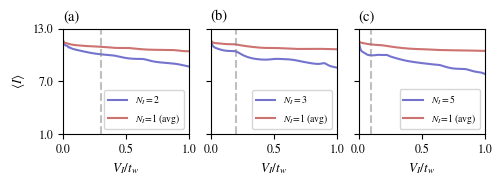

In [97]:
fig, ax = plt.subplots(1,3, figsize = (4.96,1.8))

vln = [0.3, 0.2, 0.1]
fz = 9.5
fzt = 8.5

xti = np.linspace(0, 1, 3)
xlab = [f"{xti[i]:.1f}" for i in range(len(xti))]

yti = np.linspace(1, 13, 3)
ylab = [f"{yti[i]:.1f}" for i in range(len(yti))]

for j in range(3):
    ax[j].plot(VIMP,IPR[j], c="#7474cf")
    ax[j].plot(VIMP,IPRavg[j], c = "#cc7270")
    ax[j].axvline(x= vln[j], ls="--", c = "gray", alpha = 0.5)
    
    ax[j].legend([f"$N_I=${len(m[j])}","$N_I$=1 (avg)"], fontsize = fz-2.5)
    
    ax[j].set_xlim(0,1)
    ax[j].set_ylim(1,13)
    
    ax[j].set_xticks(xti,xlab, fontsize = ft) ;
    
    ax[j].set_yticks(yti, ylab, fontsize = ft) ;
    if j>0:
        ax[j].tick_params(axis='y', labelleft=False)
        
    ax[j].set_xlabel("$V_I/t_w$", fontsize=fz);
    
ax[0].set_ylabel(r"$\langle I \rangle  $", fontsize=fz);


dicts={"(a)": ax[0], "(b)": ax[1], "(c)": ax[2]}

for key, axs in dicts.items():
    axs.set_title(key, loc='left', fontsize=fz+1)
    
plt.tight_layout(pad = 0.5)

# plt.savefig("MULTIMPGood.pdf", dpi=600, bbox_inches="tight")



In [24]:
# Generating Figure of strong impurity 

N = 9
ts, tw, F = 5, 1, Fibonr(N)
T = bihopping(FiboWord(N), F, ts, tw)

Vimp = 10*tw        
v = np.zeros(F)
v[10] = Vimp

H=  makehampbc(T,F,0) + np.diag(v)
psi = getspect(H)[1]


power = 0.5
MM = np.absolute(psi)**power


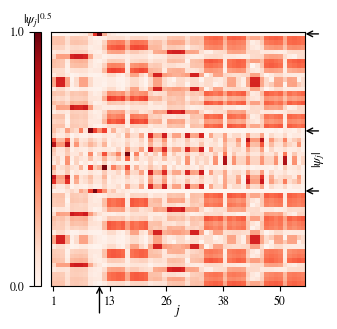

In [30]:
fig, axs = plt.subplots(1,1, figsize = (3.3,3.3))

axM = axs.imshow(MM.T[::-1,:], filternorm=False, cmap=plt.cm.Reds)
pos = axs.get_position()

fz = 9.5
ft = 8.5

axs.axes.set_yticklabels([]);
axs.set_yticks([]);

xti = np.linspace(0,49,5)
xlabs = [f"{xti[i]+1:.0f}" for i in range(len(xti)) ]

axs.set_xticks(xti,xlabs, fontsize = ft)

axs.axes.set_xlabel("$j$", fontsize=fz, labelpad = -3);
axs.axes.yaxis.set_label_position("right");
axs.axes.set_ylabel("$|\\psi_j|$", fontsize=fz);


# Adding the colorbar

poss = axs.get_position()
cbaxes = fig.add_axes([poss.x0-.05, poss.y0, 0.02, poss.height]) # This is the position for the colorbar
cb = plt.colorbar(axM, cax = cbaxes)
cb.ax.set_yticks([0,np.max(MM)], ["0.0", f"{np.max(MM):.1f}"], fontsize = ft)
cb.ax.yaxis.tick_left()
cb.ax.tick_params(axis='y', labelleft=True, labelright=False)
cb.ax.set_title("$|\\psi_j|^{%.1f}$" %(power), fontsize = fz)


row_index = [0, 21, 34]
for i in range(3):
    axs.annotate('', xy=(54, row_index[i]), xytext=(58, row_index[i]),
             arrowprops=dict(facecolor='red', arrowstyle='->'))
    
axs.annotate('', xy=(10, 54), xytext=(10, 61),
             arrowprops=dict(facecolor='red', arrowstyle='->'))

# plt.savefig("LOCPDENSBIS.svg", dpi=600, bbox_inches="tight")

# Calculating finite-size scaling

In [126]:
# IPR SIZE DEPENDENCE CALCULATION

N=[8,9,10,11,12,14,15] #(N)^th generation word

ts=5     #hopping strong
tw=1     #hopping weak

#Adding Impurities

Vimp1=tw       #weak impurity pot
VIMP=Vimp1*np.linspace(0, 0.1, 3)
# 

F=np.zeros(len(N))
m=[11, 26]

IPR=np.zeros([len(m), len(VIMP), len(N)])


for u in range(len(m)):    
    for r in tqdm(range(len(N))):

        F[r]=Fibonr(N[r]) #amount of links in chain
        
        T = bihopping(FiboWord(N[r]), int(F[r]), ts, tw)

        v=np.zeros([int(F[r]),len(VIMP)], dtype=np.complex128)
        n=[m[u]]                # Place impurities here
        Nimp=  len(n)       #number of impurities

        for i in range(len(VIMP)):

            for j in range(len(n)):
                v[n[j],i]=VIMP[i]

        #computing Hamiltonians and their eigenvects
        for i in range(len(VIMP)):
            H = makehampbc(T,int(F[r]),0) + np.diag(v[:,i])
            
            eigvect = getspect(H)[1]
            
            IPR[u,i,r]=1/F[r]*np.sum(1/np.sum(np.absolute(eigvect)**4, axis = 1))   #Inverse participation ratio


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:07<00:00,  1.01s/it]


## Finite-size scaling of the IPR

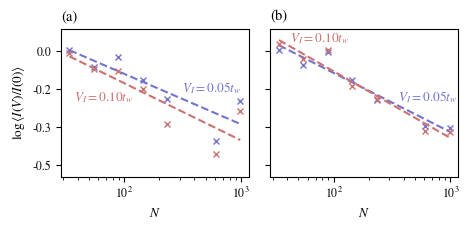

In [166]:
#IPR plot size dependence

from scipy.optimize import curve_fit
def fit(x,a,b):
    return a*x + b

clrs = ["#7474cf", "#cc7270"]
fz = 9.5
ft = 8.5

yti = np.linspace(-0.5, 0, 4)

ylab = [f"{yti[i]:.1f}" for i in range(len(yti))]


FF=np.zeros(len(N))
for i in range(len(N)):
    FF[i]=Fibonr(N[i])
    
fig, ax = plt.subplots(1,2, figsize=(4.8,2.4))

for u in range(len(m)):
    for i in range(1,len(VIMP)):
        ax[u].plot(FF,np.log(IPR[u,i,:]/IPR[u,0,:]), "x", ms=5, c = clrs[i-1], label = f"$V_I={VIMP[i]:.2f}t_w$")
        popt1, pcov1 = curve_fit(fit, np.log(FF), np.log(IPR[u,i,:]/IPR[u,0,:]))
        ax[u].plot(FF, fit(np.log(FF), *popt1), ls="--", c = clrs[i-1], label = f"fit $V_I={VIMP[i]:.2f}t_w$")

#     ax[u].legend(fontsize = fz-3)

    ax[u].set_xlabel("$N$", fontsize=fz);
    ax[u].set_xscale("log")
    ax[u].tick_params(axis="x", labelsize=ft)
    ax[u].set_ylim(-0.55,0.1)
    ax[u].set_yticks(yti, ylab, fontsize = ft) ;


ax[1].tick_params(axis='y', labelleft=False)
ax[0].set_ylabel(r"$\log\langle I(V)/ I(0)\rangle $", fontsize=fz);

ax[0].text(1000 , -0.18, f"$V_I={VIMP[1]:.2f}t_w$", color=clrs[0], fontsize=fz, ha='right')
ax[0].text(120 , -0.22, f"$V_I={VIMP[2]:.2f}t_w$", color=clrs[1], fontsize=fz, ha='right')

ax[1].text(1150 , -0.22, f"$V_I={VIMP[1]:.2f}t_w$", color=clrs[0], fontsize=fz, ha='right')
ax[1].text(135 , 0.04, f"$V_I={VIMP[2]:.2f}t_w$", color=clrs[1], fontsize=fz, ha='right')

dicts={"(a)": ax[0], "(b)": ax[1]}

for key, axs in dicts.items():
    axs.set_title(key, loc='left', fontsize=fz+1)
    
plt.tight_layout()
    
# plt.savefig("IPRFSS_At_MolGood.pdf", dpi=600, bbox_inches="tight")

## Finite-size scaling of the overlap integrals

In [22]:
# OLP SIZE DEPENDENCE CALCULATION

N=[8,9,10,11,12,14,15,16,17,18] #(N)^th generation word
# N=[8,9,10,11,12,14,15] #(N)^th generation word


ts=5     #hopping strong
tw=1     #hopping weak

#Adding Impurities

Vimp1 = tw       #weak impurity pot
VIMP = Vimp1*np.linspace(0, 0.1, 3)
# 

F = np.zeros(len(N))
m = [16, 33]

aOLP = np.zeros([2, len(m), len(VIMP), len(N)]) #initializing average OLP at with [cluster, imp, Vi, Size] indices
mOLP = np.zeros([2, len(m), len(VIMP), len(N)]) #initializing average OLP mol with [cluster, imp, Vi, Size] indices

OLP = [aOLP, mOLP]

for aa in range(2):
    for u in range(len(m)):    
        for r in tqdm(range(len(N))):

            F[r]=Fibonr(N[r]) #amount of links in chain

            T = bihopping(FiboWord(N[r]), int(F[r]), ts, tw)

            eigvect = np.zeros([len(VIMP),int(F[r]),int(F[r])], dtype=np.complex128)

            v=np.zeros([int(F[r]),len(VIMP)], dtype=np.complex128)
            n=[m[u]]                # Place impurities here
            Nimp=  len(n)       #number of impurities

            for i in range(len(VIMP)):

                for j in range(len(n)):
                    v[n[j],i]=VIMP[i]


            #computing Hamiltonians and their eigenvects
            for i in range(len(VIMP)):
                H = makehampbc(T,int(F[r]),0) + np.diag(v[:,i])
                eigvect[i,:,:] = getspect(H)[1]

            IDm = np.append(np.arange(Fibonr(N[r]-2)), np.arange(Fibonr(N[r]-1), int(F[r]))) #molecular state indices
            IDa = np.arange(Fibonr(N[r]-2),Fibonr(N[r]-1)) #atomic state indices

            psia = eigvect[:,:,IDa]
            psim = eigvect[:,:,IDm]

            for i in range(len(VIMP)):
                olpa = np.sum(np.abs(psia[0,:,:].conj()*psia[i,:,:]), axis = 1)

                olpm = np.sum(np.abs(psim[0,:,:].conj()*psim[i,:,:]), axis = 1)

                OLP[aa][0,u,i,r] = np.sum(olpa.real)/len(IDa)    #Avg OLP int for atomic cluster
                OLP[aa][1,u,i,r] = np.sum(olpm.real)/len(IDm)    #Avg OLP int for molecular cluster


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [07:20<00:00, 44.04s/it]


## Plotting the finite-size scaling of the overlap integrals

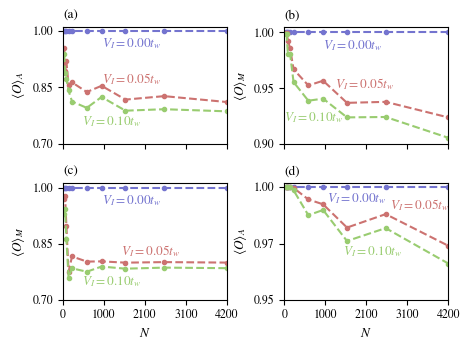

In [96]:
FF=np.zeros(len(N))
for i in range(len(N)):
    FF[i]=Fibonr(N[i])

fig, ax = plt.subplots(2,2, figsize = (4.8,3.6))


clrs = ["#7474cf", "#cc7270", "#99cc70"]
fz = 9.5
ft = 8.5

# yti = np.linspace(-0.5, 0, 4)
# ylab = [f"{yti[i]:.1f}" for i in range(len(yti))]

for u in range(2):
    for j in range(len(VIMP)):
        ax[0,u].plot(FF,OLP[0][u,0,j,:], ".--",c = clrs[j], label = f"$V_I={VIMP[j]:.2f}t_w$")
        ax[1,(u+1)%2].plot(FF,OLP[1][u,1,j,:], ".--",c = clrs[j], label = f"$V_I={VIMP[j]:.2f}t_w$")

#     ax[0,u].legend(fontsize = fz-4)
#     ax[1,(u+1)%2].legend(fontsize = fz-4)
    
# fzt = 9.5
            
for i in range(2):
#     ax[i,1].tick_params(axis='y', labelleft=False)
    ax[0,i].tick_params(axis='x', labelbottom=False)
    ax[1,i].set_xlabel("$N$", fontsize=fz);
    
    ax[(i-1)%2,(i+1)%2].set_ylabel(r"$\langle O \rangle_A  $", fontsize=fz);
    ax[(i+1)%2,i].set_ylabel(r"$\langle O \rangle_M  $", fontsize=fz);
    
xti = np.linspace(0, np.max(FF) ,5)
xlabs = [f"{np.round(xti[i] / 100) * 100:.0f}" for i in range(len(xti))]

for axs in ax.flatten():
    axs.set_xlim([0, np.max(FF)])
    axs.set_xticks(xti,xlabs, fontsize = ft)
    

mx1, mx2 = np.max(OLP[0][:,:,0]), np.max(OLP[0][:,:,1])
mn1, mn2 = np.min(OLP[0][:,:,0]), np.min(OLP[0][:,:,1])

yti1 = np.linspace(0.7, 1, 3)
ylab1 = [f"{yti1[i]:.2f}" for i in range(len(yti1))]
yti2 = np.linspace(0.9, 1, 3)
ylab2 = [f"{yti2[i]:.2f}" for i in range(len(yti2))]
yti3 = np.linspace(0.95, 1, 3)
ylab3 = [f"{yti3[i]:.2f}" for i in range(len(yti3))]

for i in range(2):    
    ax[i,0].set_yticks(yti1, ylab1, fontsize = ft)

ax[0,1].set_yticks(yti2, ylab2, fontsize = ft)
ax[1,1].set_yticks(yti3, ylab3, fontsize = ft)

#     ax[i,1].set_ylim([mn2-.05, mx2+.01])
#     ax[i,0].set_ylim([mn1-.05, mx1+.01])
    
for i in range(2):
    ax[i,0].text(2500 , 0.957, f"$V_I={VIMP[0]:.2f}t_w$", color=clrs[0], fontsize=fz, ha='right')

ax[0,1].text(2500 , 0.985, f"$V_I={VIMP[0]:.2f}t_w$", color=clrs[0], fontsize=fz, ha='right')
ax[1,1].text(2600 , 0.9935, f"$V_I={VIMP[0]:.2f}t_w$", color=clrs[0], fontsize=fz, ha='right')

    
ax[0,0].text(2500 , 0.86, f"$V_I={VIMP[1]:.2f}t_w$", color=clrs[1], fontsize=fz, ha='right')
ax[0,0].text(2000 , 0.75, f"$V_I={VIMP[2]:.2f}t_w$", color=clrs[2], fontsize=fz, ha='right')

ax[0,1].text(2800 , 0.95, f"$V_I={VIMP[1]:.2f}t_w$", color=clrs[1], fontsize=fz, ha='right')
ax[0,1].text(1500 , 0.92, f"$V_I={VIMP[2]:.2f}t_w$", color=clrs[2], fontsize=fz, ha='right')

ax[1,0].text(3000 , 0.82, f"$V_I={VIMP[1]:.2f}t_w$", color=clrs[1], fontsize=fz, ha='right')
ax[1,0].text(2000 , 0.74, f"$V_I={VIMP[2]:.2f}t_w$", color=clrs[2], fontsize=fz, ha='right')

ax[1,1].text(4200 , 0.99, f"$V_I={VIMP[1]:.2f}t_w$", color=clrs[1], fontsize=fz, ha='right')
ax[1,1].text(3000 , 0.97, f"$V_I={VIMP[2]:.2f}t_w$", color=clrs[2], fontsize=fz, ha='right')

# ax[1,1].legend(fontsize = ft)


    
dicts={"(a)": ax[0,0], "(b)": ax[0,1], "(c)": ax[1,0], "(d)": ax[1,1]}

for key, axs in dicts.items():
    axs.set_title(key, loc='left', fontsize=fz)

plt.tight_layout(w_pad=-0.5)   


# plt.savefig("OLPSIZEdepGood.pdf", dpi=600, bbox_inches="tight")